<a href="https://colab.research.google.com/github/Pandey-A/ml-labs/blob/main/Ashutosh_Pandey_A1_14____Lab_03_Sklearn_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab-03: Linear Regression using Scikit-Learn**

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using Gradient Descent
- Utilize  scikit-learn to implement linear regression using a close form solution based on the normal equation

## Tools
You will utilize functions from scikit-learn as well as NumPy, Pnadas, and matplotlib.

In [ ]:
# Import the required libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor , LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### **Load the data set**

In [ ]:
data = pd.read_csv("/content/houses.csv", header=None, names=['size(sqft)','bedrooms','floors','age', 'price'])

In [ ]:
#use head() function and see first few rows of the data
data.head()

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [ ]:
# Check the shape of the data using .shape attribute
data.shape

(100, 5)

In [ ]:
# Seperate the Features and Target variable and assign it into X and y respectively. (Hint: use data.iloc[])

X = data.iloc[:,0:4]
y = data.iloc[:,-1]
X.shape

(100, 4)

In [ ]:
# Check the shape of X and y using .shape attribute
y.shape

(100,)

In [ ]:
# split your data into X_train, X_test, y_train, y_test using train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

### **Scale/normalize the training data**
Use StandardScaler() class to normalize the features X_train and X_test

In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")

Peak to Peak range by column in Raw        X:size(sqft)    2378.0
bedrooms         4.0
floors           1.0
age             95.0
dtype: float64
Peak to Peak range by column in Normalized X:[5.68410556 5.80763207 2.09656967 3.72814687]


### Create and fit the regression model

In [ ]:
sgdr=SGDRegressor(max_iter=1000,tol=0.00001,random_state=4,learning_rate='invscaling' , eta0=0.03)
sgdr.fit(X_train_norm,y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(eta0=0.03, random_state=4, tol=1e-05)
number of iterations completed: 45, number of weight updates: 3601.0


### View parameters
Note, the parameters are associated with the *normalized* input data.


In [ ]:
Intercept = sgdr.intercept_
Coefficients = sgdr.coef_
print(f"model parameters: Coefficients:{Coefficients}, Intercept: {Intercept}")

model parameters: Coefficients:[114.17536957 -23.41772026 -34.39326509 -36.48076842], Intercept: [362.74026272]


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_test)

# make a prediction using the updated parameters.
y_pred = np.dot(X_test,Coefficients) +Intercept

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:4]}" )
print(f"Target values \n{y_test[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on test set:
[164409.26575457 124523.49350404 237901.72298709 222624.5050407 ]
Target values 
83    350.0
53    290.0
70    480.0
45    504.0
Name: price, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


### Plot Results
Let's plot the predictions versus the target values.

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

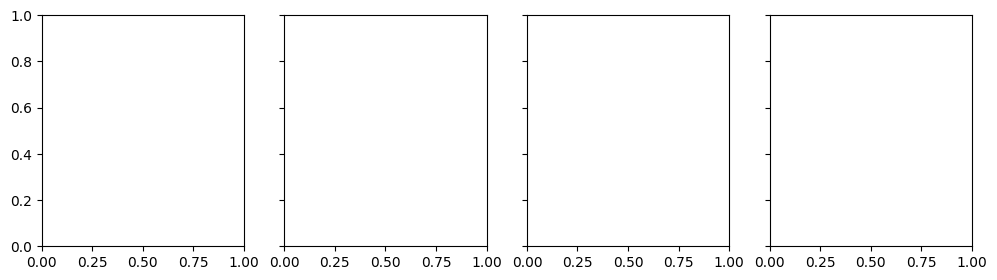

In [ ]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
y_pred_train = sgdr.predict(X_train_norm)
for i in range(len(ax)):
    ax[i].scatter(X_train.iloc[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X.columns[i])
    ax[i].scatter(X_train.iloc[:,i],y_pred_train,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# Linear Regression using Normal Equation (Closed Form Solution)

<a name="toc_40291_2"></a>
# Scikit-learn has the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) which implements a closed-form linear regression.

Let's use the same data available in houces.csv file and determine the model parameter using closed form solution.

### Create and fit the model
The code below performs regression using scikit-learn.
The first step creates a regression object.  
The second step utilizes one of the methods associated with the object, `fit`. This performs regression, fitting the parameters to the input data. The toolkit expects a two-dimensional X matrix.

In [ ]:
X_train = np.array(X_train)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
Intercept = linear_model.intercept_
Coefficients = linear_model.coef_
print(f"model parameters: Coefficients:{Coefficients}, Intercept: {Intercept}")

model parameters: Coefficients:[  0.27336303 -33.99399291 -72.14701933  -1.42991285], Intercept: 222.10580513061927


### **Make Predictions**

Calling the `predict` function generates predictions.

In [ ]:
# make a prediction using linear_model.predict()
y_pred = linear_model.predict(X_test)
# make a prediction using the updated parameters.
y_pred_lr = np.dot(X_test,Coefficients) +Intercept

print(f"prediction using np.dot() and linear_model.predict match: {(y_pred == y_pred_lr).all()}")

print(f"Prediction on test set:\n{y_pred[:5]}" )
print(f"Target values \n{y_test[:5]}")


prediction using np.dot() and linear_model.predict match: True
Prediction on test set:
[335.36490213 309.24839969 509.98077803 486.82917196 449.35761786]
Target values 
83    350.0
53    290.0
70    480.0
45    504.0
44    425.8
Name: price, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# **Evaluation of the model**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² score: 0.9527
Mean Squared Error (MSE): 585.5868
Root Mean Squared Error (RMSE): 24.1989
Mean Absolute Error (MAE): 20.7138


## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit
- implemented linear regression using a close-form solution from that toolkit